In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
#EDA analysis

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#Here in our data set on the bases of some observations we can say that some values are given as ? mark, we need to replace them with suitable values.

In [8]:
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('-----------------------------------')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
-----------------------------------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
-----------------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-----------------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-----------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-----------------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71

In [10]:
#By checking value counts of every column we can conclude that three columns having '?' mark.
#collision_type, property_damage, police_report_available contain many missing values. 
#So, first isolate these variables, inspect these individually for spread of category values.

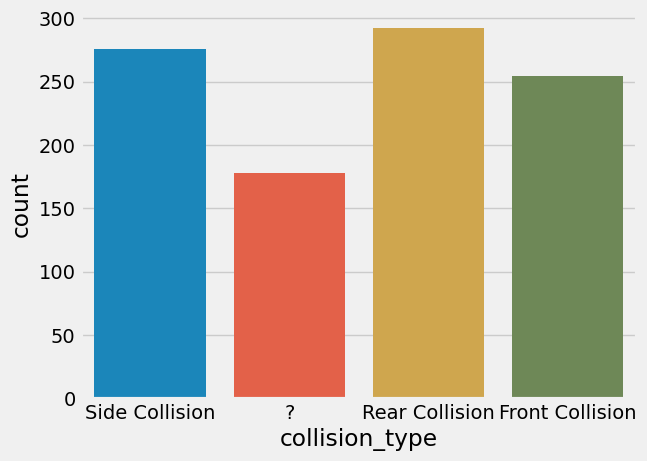

In [11]:
plt.style.use('fivethirtyeight')
sns.countplot(x = 'collision_type', data = df)
plt.show()

In [12]:
#we can say that most of the cases are of rear collision. we will treat '?' as a unknown type of collision

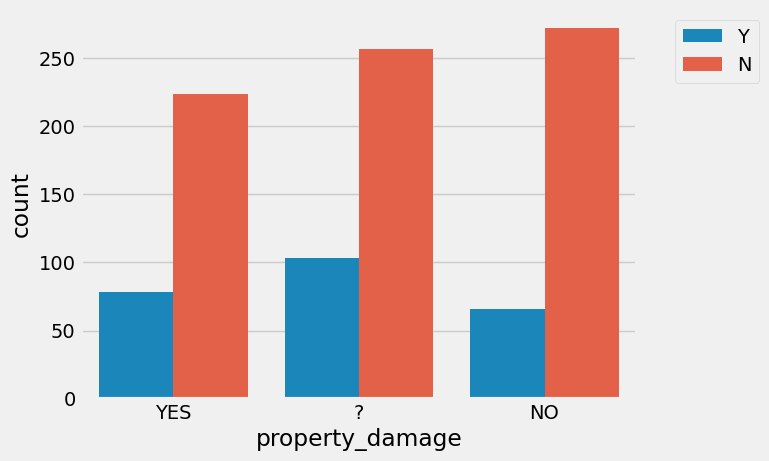

In [13]:
#lets check counts for property_damage
sns.countplot(x = 'property_damage',hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [14]:
#By looking at the above plot we can say that most number of cases shows no property_damage and '?' mark, we will treat '?' as no property_damage

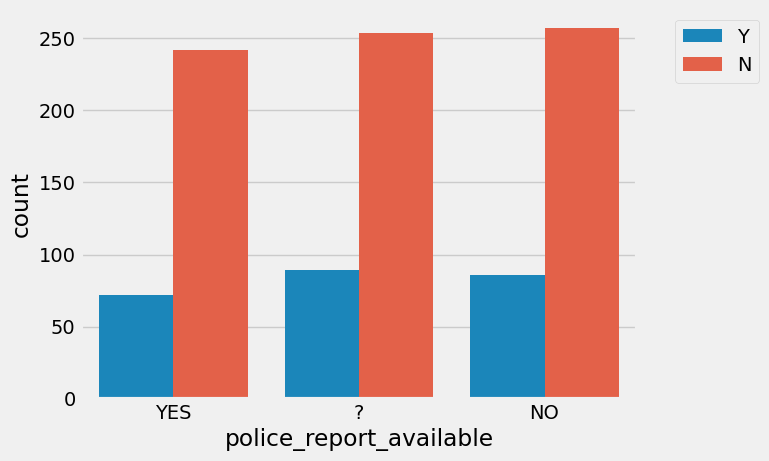

In [15]:
#lets check counts for police_report_available 
sns.countplot(x = 'police_report_available',hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [16]:
#Above plot shows nearly same number of each category, we will treat '?' as No police_report_available

N    753
Y    247
Name: fraud_reported, dtype: int64


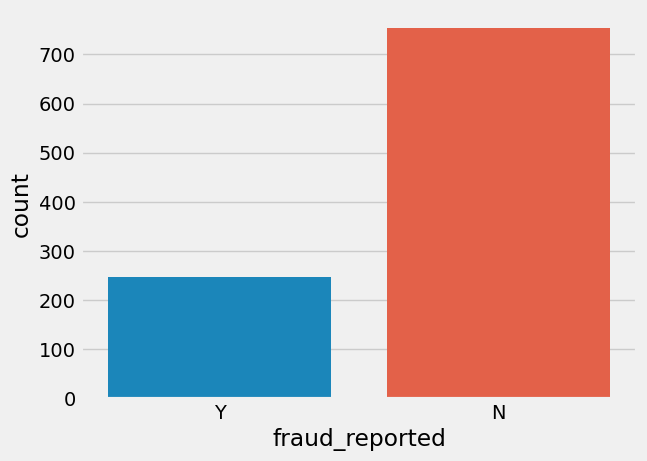

In [17]:
#lets have a look on our target variable
sns.countplot(df['fraud_reported'])
print(df['fraud_reported'].value_counts())
plt.show()

In [18]:
#Here we see that almost 25% fraud reported.

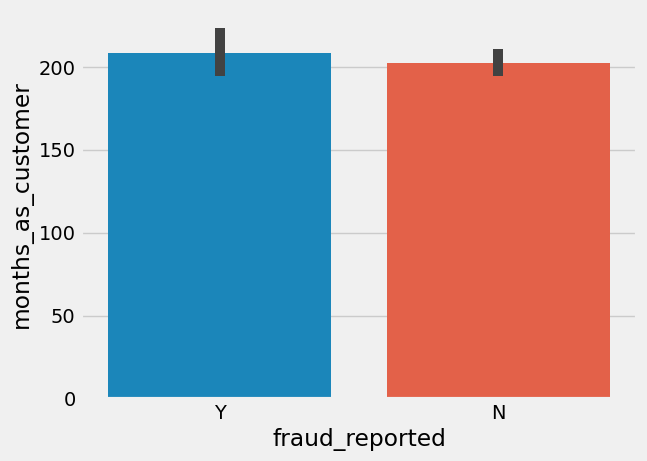

In [19]:
#Lets check how months_as_customer affects target varaible
plt.style.use('fivethirtyeight')
sns.barplot(x = "fraud_reported", y = "months_as_customer", data = df)
plt.show()

In [20]:
#This will tell us that it doesn't matter for how many months the customer is bounded with the company to check fraud report.

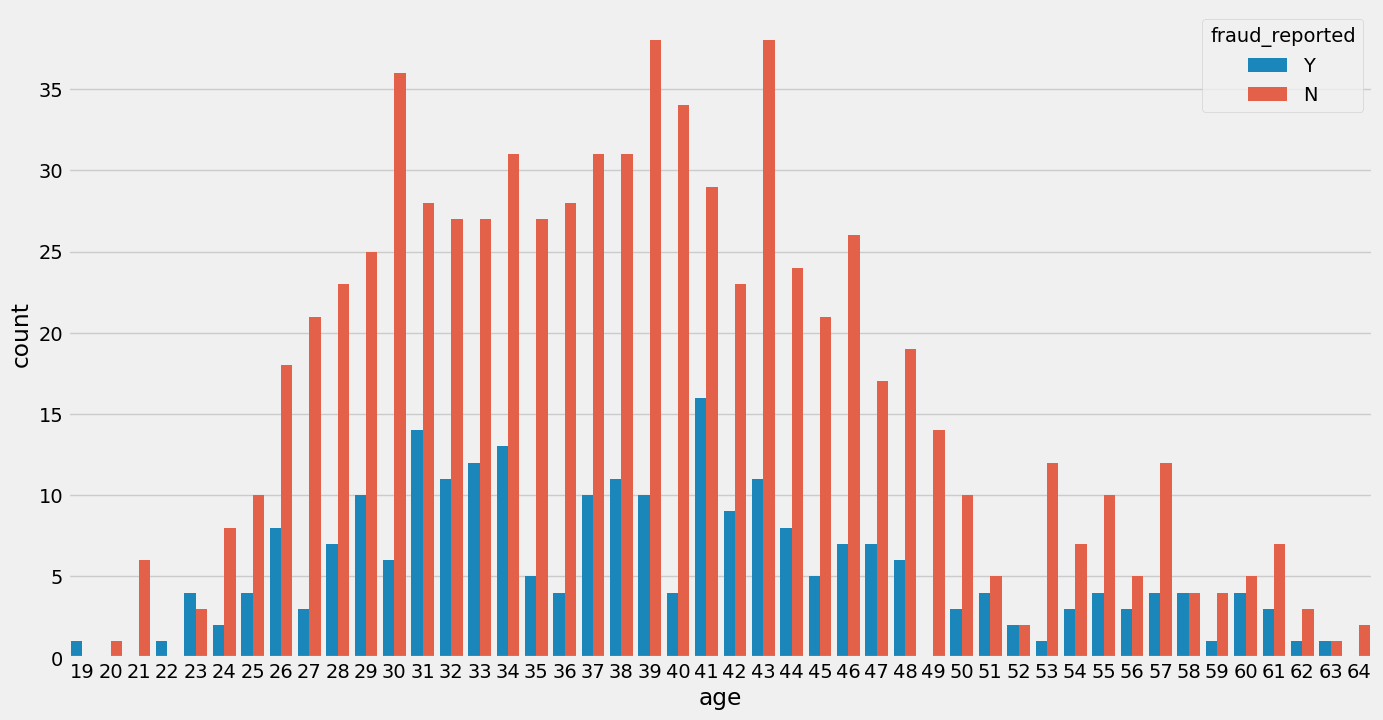

In [21]:
#lets check the fraud_report based on age
plt.figure(figsize = (15,8))
sns.countplot(x = 'age', hue = 'fraud_reported', data = df)
plt.show()

In [22]:
#By this plot we can conclude that customer of age range between 19 to 23 has more tendency to reported as fraud than not a fraud.

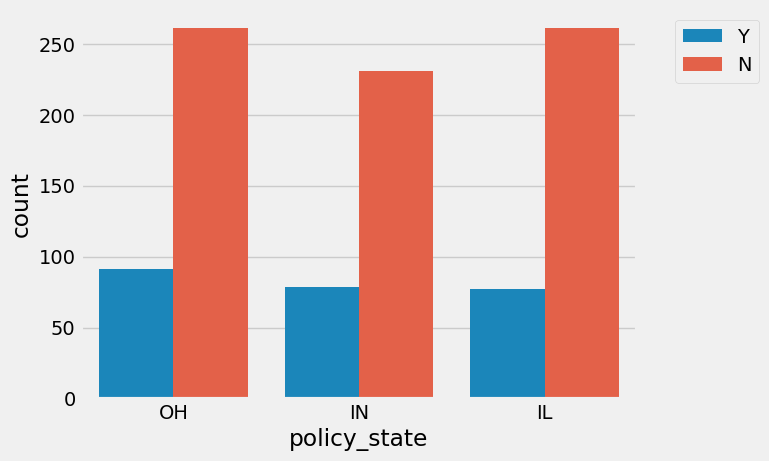

In [23]:
#lets check fraud_report based on policy_state 
sns.countplot(x = 'policy_state', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

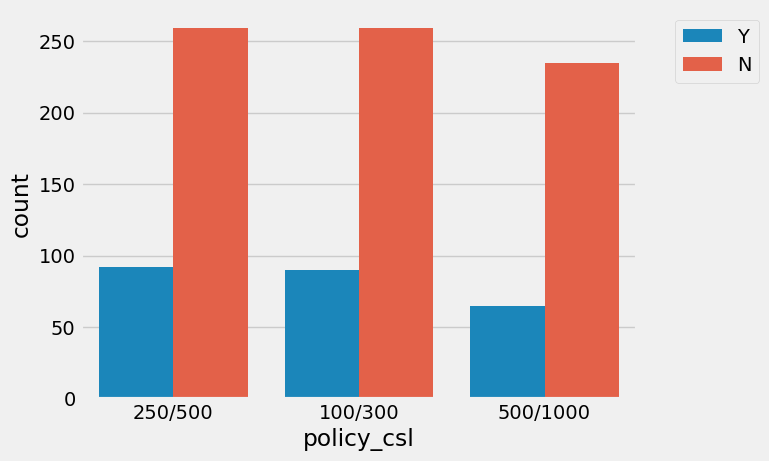

In [24]:
#lets check fraud_report based on policy_state 
sns.countplot(x = 'policy_csl', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [25]:
#It looks like policy_csl 500/1000 has less counts compared to others.

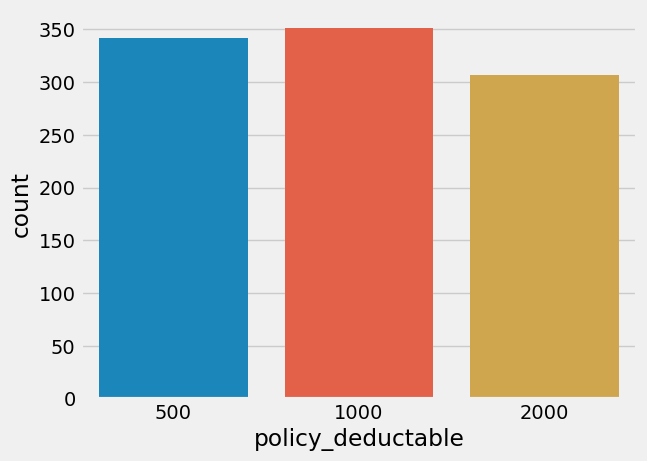

In [26]:
#lets check fraud_report based on policy_state 
sns.countplot(df['policy_deductable'])
plt.show()

In [27]:
#this will tell us that there are more number of policy_deductable of 1000 and 500 than 2000

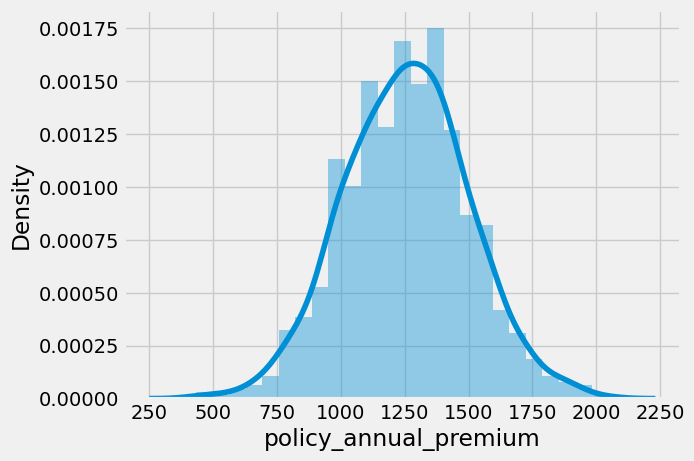

In [28]:
#lets have a look at destribution of policy_annual_premium
sns.distplot(df['policy_annual_premium'])
plt.show()

In [29]:
#Looking at the above plot we see that policy_annual_premium is mostly ditributed in the range of 1000 to 1500

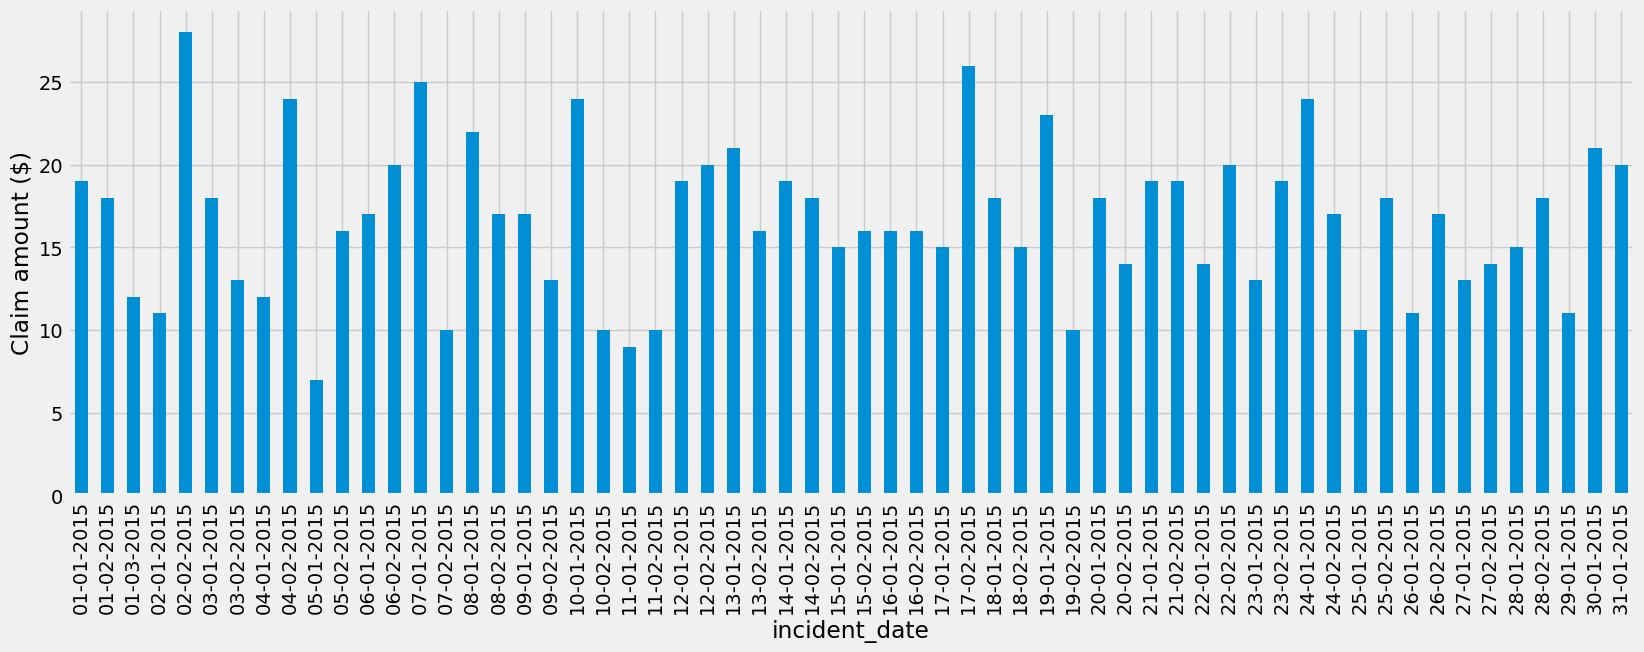

In [30]:
# plotting barplot for incident_date vs Claim amount ($)
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

In [31]:
#We can see that, all the cases in above plot are for the months of January and February 2015 and only one case is from march 2015.

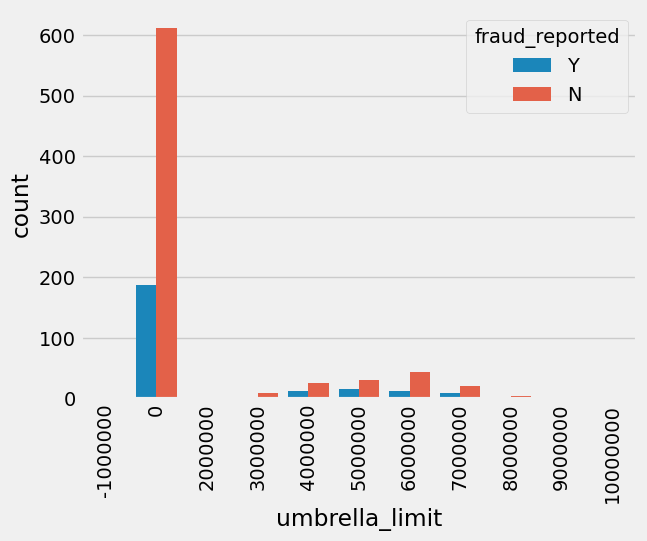

In [32]:
#lets see fraud_reported based on umbrella_limit
sns.countplot(x = 'umbrella_limit', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 90)
plt.show()

In [33]:
#An umbrella insurance policy is extra liability insurance coverage given to customers. here we can see it is mostly 0.

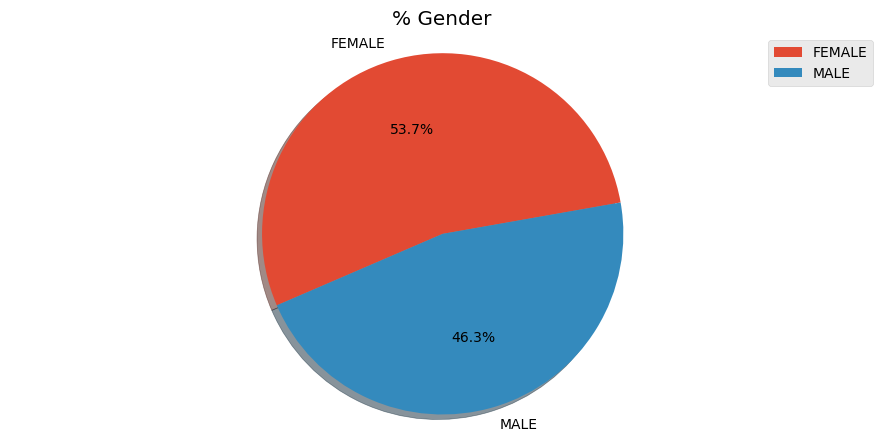

In [34]:
# Creating a pie chart for 'Marital status'
plt.style.use('ggplot')
gender = df['insured_sex'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(gender.values, labels = gender.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('% Gender ')
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

In [35]:
#We can say that the number of females is more than that of the males.

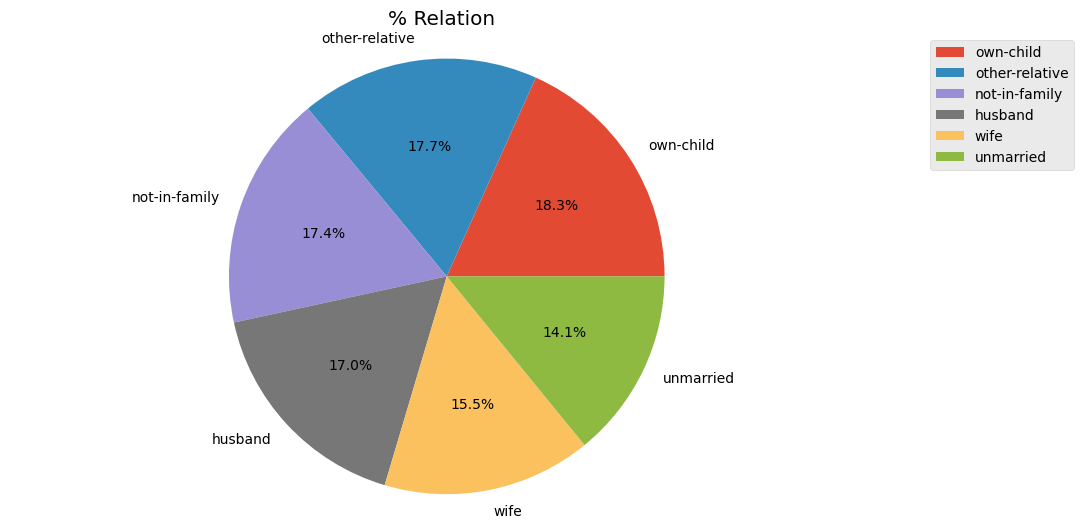

In [36]:
#Lets have a look on insured_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["insured_relationship"].value_counts().values, labels = df["insured_relationship"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('% Relation ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [37]:
#here we can see all kind of relation exists almost in equal percentage.

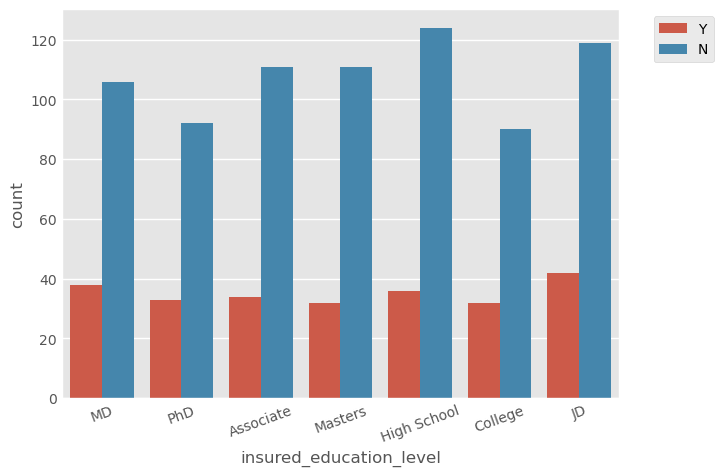

In [38]:
#lets check fraud_reported based on insured_education_level 
sns.countplot(x = 'insured_education_level', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 20)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [39]:
#We can see that higher number of cases where customers educated till high school level.
#And it seems like getting fraud ratio nearly equal in all cases.

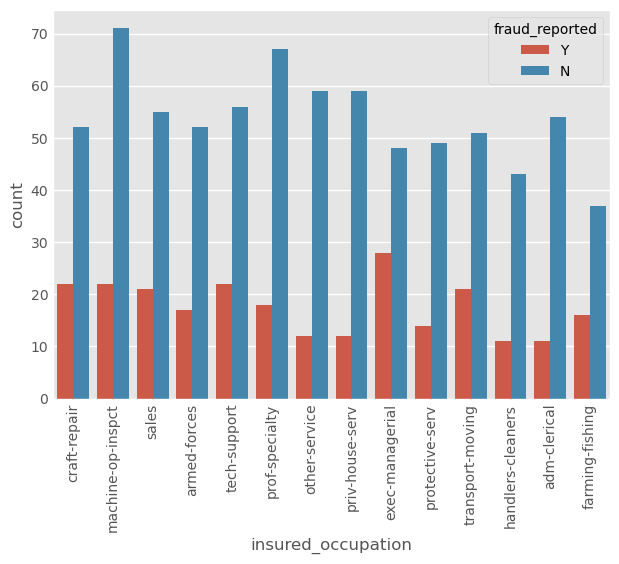

In [40]:
#lets check fraud_reported based on insured_occupation 
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 90)
plt.show()

In [41]:
#This will tell us that the ratio of fraud to not a fraud is higher in case of exec-managerials compared to other categories.

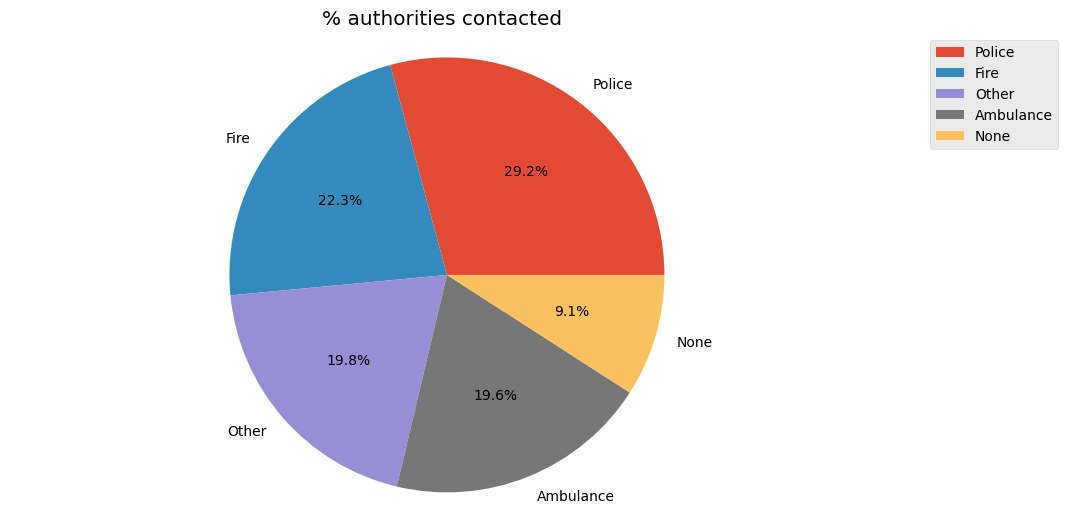

In [42]:
#Lets have a look on insured_relationship, how it is distributed
plt.figure(figsize=(10, 6))
plt.pie( df["authorities_contacted"].value_counts().values, labels = df["authorities_contacted"].value_counts().index, autopct='%1.1f%%')
fig = plt.gcf()
plt.title('% authorities contacted ')
plt.axis('equal')
plt.legend(prop={'size': 12})
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [43]:
#This will tell us in 29.2% of cases applicant contacted to police and in 22.3% of cases to fire, and in 19.6% of cases they contacted to ambulance

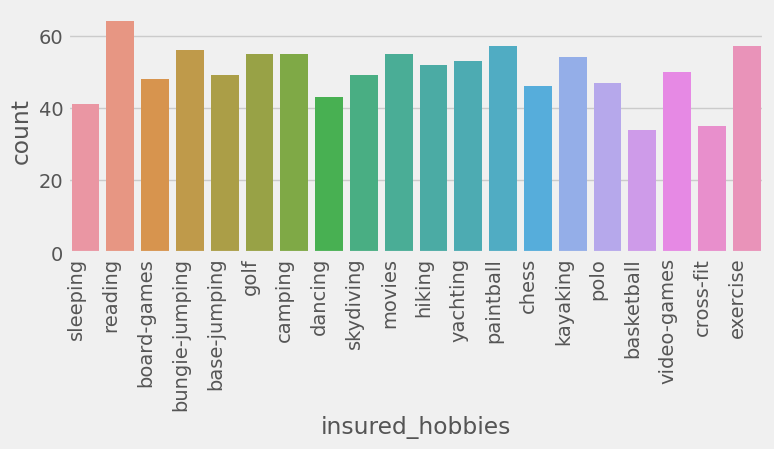

In [44]:
#lets plot countplot for hobbies
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [45]:
#We can say more number of people are having hobbie of reading, exercise, paintball and very less number of people go for basketball and cross-fit.

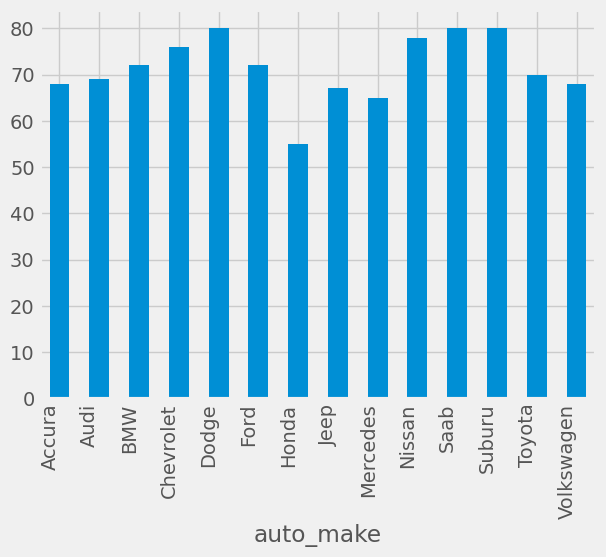

In [46]:
#lets plot countplot for auto_make column
ax = df.groupby('auto_make').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [47]:
#this will tell us that very less number of honda vehicles claimed for insurance.

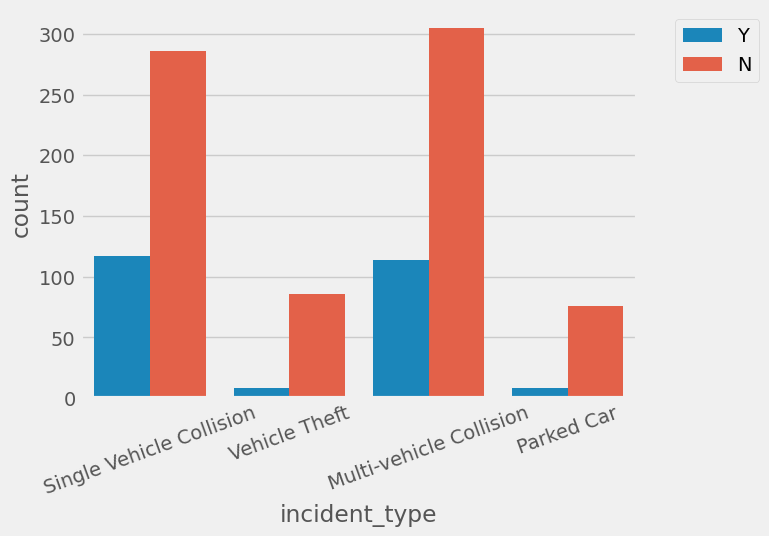

In [48]:
#lets see fraud_reported based on incident_type
sns.countplot( x = 'incident_type', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 20)

plt.show()

In [49]:
#by observing this plot we can say that more cases for insurance claims are from single Vehicle collision and Multi-vehicle collision, and fraud cases also more in these categories.

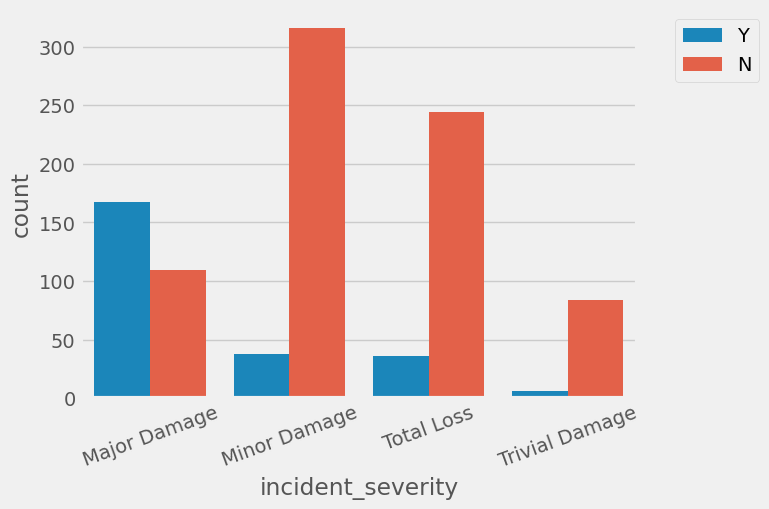

In [50]:
#lets check fraud_report based on incident_severity
sns.countplot(x = 'incident_severity', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 20)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [51]:
#By this plot we can clearly observe that in case of major damage fraud cases are higher compared to others.

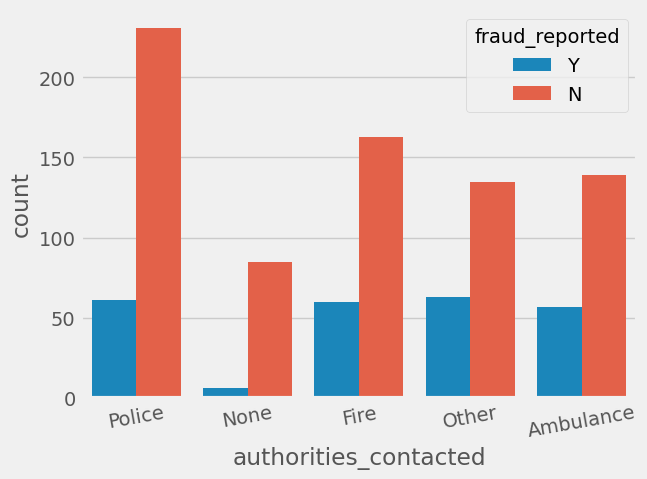

In [52]:
#lets check fraud_report based on authorities_contacted
sns.countplot(x = 'authorities_contacted', hue = 'fraud_reported', data = df)
plt.xticks(rotation = 10)
plt.show()

In [53]:
#Here when authorities_contacted belongs to None category the cases of getting reported as a fraud are very less.

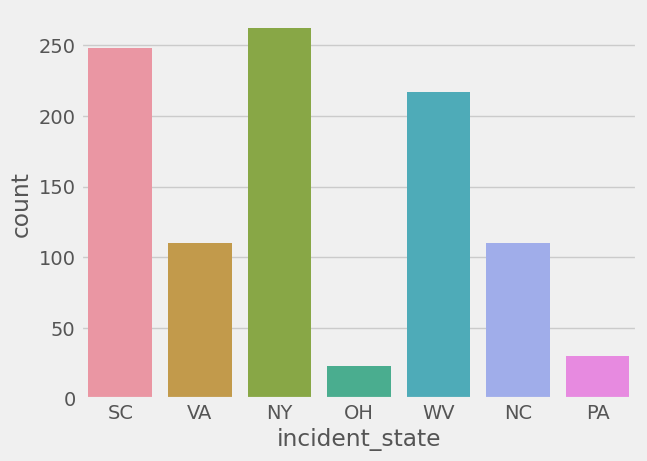

In [54]:
#lets check the counts for incident_state column
sns.countplot(x = 'incident_state',data = df)
plt.show()

In [55]:
#there are large number of cases belongs to SC and NY and very less are belong to OH and PA.

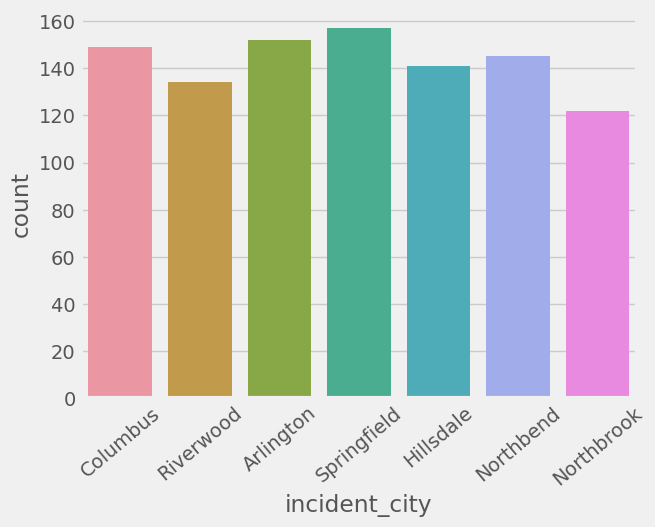

In [56]:
#lets check the counts for incident_state column
sns.countplot(x = 'incident_city',data = df)
plt.xticks(rotation = 40)
plt.show()

In [57]:
#this will tell us that more number of cases are from springfield, arlington and columbus cities.

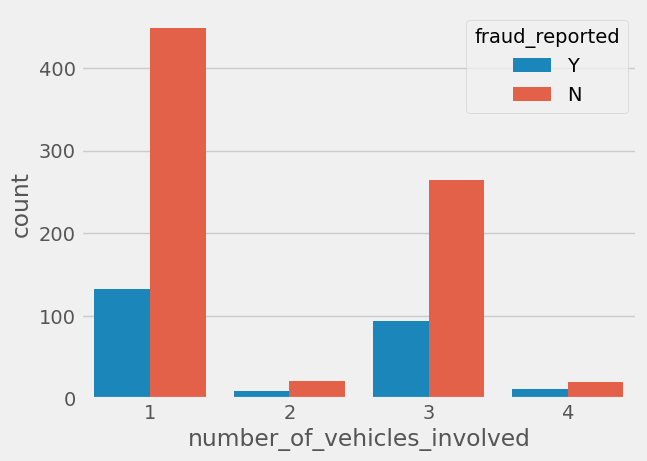

In [58]:
#lets check fraud_report based on number_of_vehicles_involved
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = df)
plt.show()

In [59]:
#This will tell us that in most of the cases number of vehicles involved is 1 or 3, in this case the ratio of getting fraud is less when it is compared with number of vehicles involved is 4.

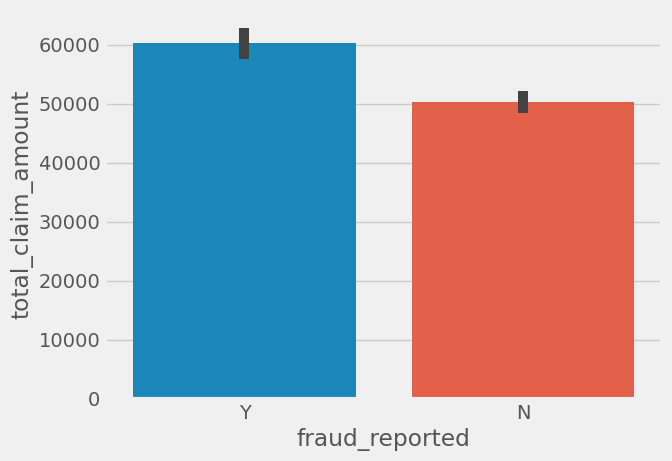

In [60]:
#lets check fraud_reported based on total_claim_amount
sns.barplot(x = 'fraud_reported', y = 'total_claim_amount', data = df)
plt.show()

In [61]:
#We can say that when total claim ammount is above 50000, then mostly getting fraud is reported.

In [62]:
#lets have a look on different claims
claim = pd.DataFrame(df, columns = ['total_claim_amount','injury_claim','property_claim','vehicle_claim'])
claim.head(10)

,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,71610,6510,13020,52080
1,5070,780,780,3510
2,34650,7700,3850,23100
3,63400,6340,6340,50720
4,6500,1300,650,4550
5,64100,6410,6410,51280
6,78650,21450,7150,50050
7,51590,9380,9380,32830
8,27700,2770,2770,22160
9,42300,4700,4700,32900


In [63]:
#By observing above data we can say that total claim is a sum of other claims like injury claims, property claim, vehicle claims.

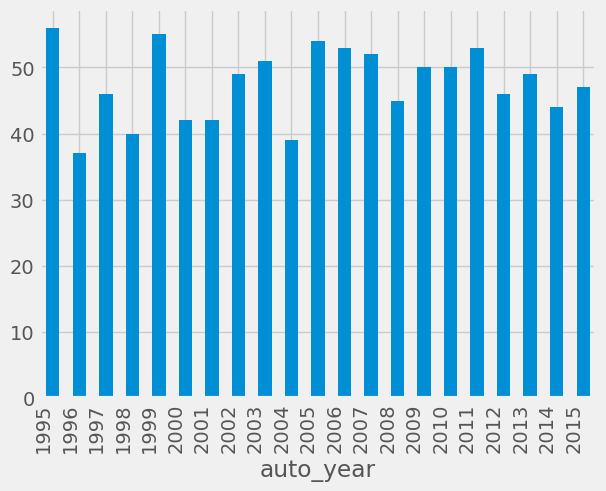

In [64]:
#lets plot countplot for auto_year column
ax = df.groupby('auto_year').vehicle_claim.count().plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [65]:
#Looking at this plot we can say we are having the vehicles which are made since 1995 to 2015, less number of vehicles are there which are made in the year of 1996 and 2004.

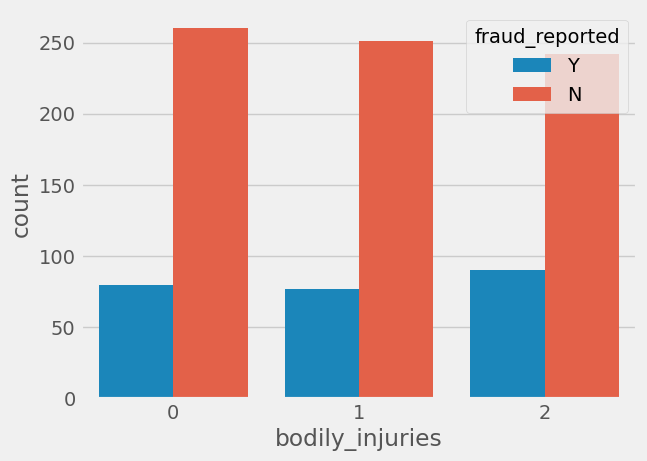

In [66]:
# lets check fraud report based on bodily_injuries
sns.countplot(x = 'bodily_injuries', hue = 'fraud_reported', data = df)
plt.show()

In [67]:
#we can observe that we have almost equal numbers of these three types in bodily_injuries with nearly equal ratio.

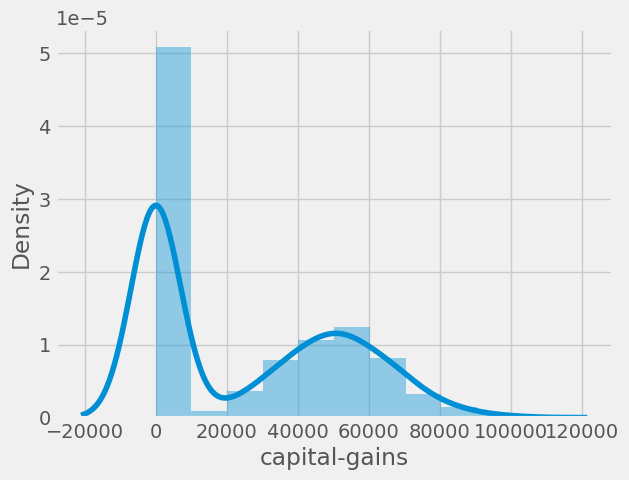

In [68]:
#lets have a look on capital gains
sns.distplot(df['capital-gains'])
plt.show()

In [69]:
#capital gain is highly distributed at 0.

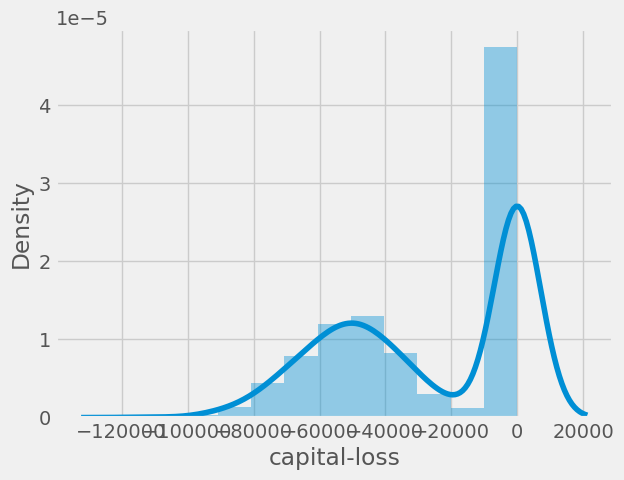

In [70]:
#lets see how capital loss is distributed
sns.distplot(df['capital-loss'])
plt.show()

In [71]:
#capital loss is highly distributed at 0 and is in negative numbers.

In [72]:
#Data processing

In [73]:
#lets replace the categorical data in columns property_damage and police_report_available with suitable number
# I am replacing '?' with most frequent number of that column
df['property_damage'].replace('YES', 1, inplace=True)
df['property_damage'].replace('NO', 0, inplace=True)
df['property_damage'].replace('?', 0, inplace=True)
df['police_report_available'].replace('YES', 1, inplace=True)
df['police_report_available'].replace('NO',0, inplace=True)
df['police_report_available'].replace('?', 0, inplace=True)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,1,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,0,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,0,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [74]:
#lets drop unwanted columns
df.drop(columns = ['policy_number','policy_bind_date'], inplace = True)

In [75]:
#Because policy_number is just a identity number for particular policy and it is not contributing to target variable.
#And also policy_bind_date is not showing any relation with target variable

In [76]:
#As column '_c39' is having all null values, we will drop this column also
df.drop(columns = '_c39', inplace = True)

In [77]:
#lets replace label data with 0 & 1
df['fraud_reported'].replace('Y', 1, inplace = True)
df['fraud_reported'].replace('N', 0, inplace = True)

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,0,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0


In [78]:
#check count for insured_zip
df[['insured_zip']].value_counts()

insured_zip
431202         2
477695         2
446895         2
456602         2
469429         2
              ..
455426         1
455482         1
455672         1
455689         1
620962         1
Length: 995, dtype: int64

In [79]:
#as insured_zip represents zip code we will make data type of column insured_zip as object
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [80]:
#Lets use policy_csl and make two different columns
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [81]:
#lets Derive the age of the vehicle based on the year value by assuming the data is collected in the year 2018
df['vehicle_age'] = 2018 - df['auto_year']

In [82]:
#lets check dataset after updating
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,Saab,92x,2004,1,250,500,14
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,Mercedes,E400,2007,1,250,500,11
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,Dodge,RAM,2007,0,100,300,11
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,250,500,4
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,Accura,RSX,2009,0,500,1000,9


In [83]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                     object
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage          

In [84]:
#lets drop unwanted columns
df.drop(columns = ["policy_csl","auto_year","incident_date","insured_zip",], inplace = True)

In [85]:
#insured_zip has 995 different entries and incident_date contains data only from two months of 2015 so I decided to drop these columns as well.
#For policy_csl and auto_year I have derived separate columns so I am dropping these columns.

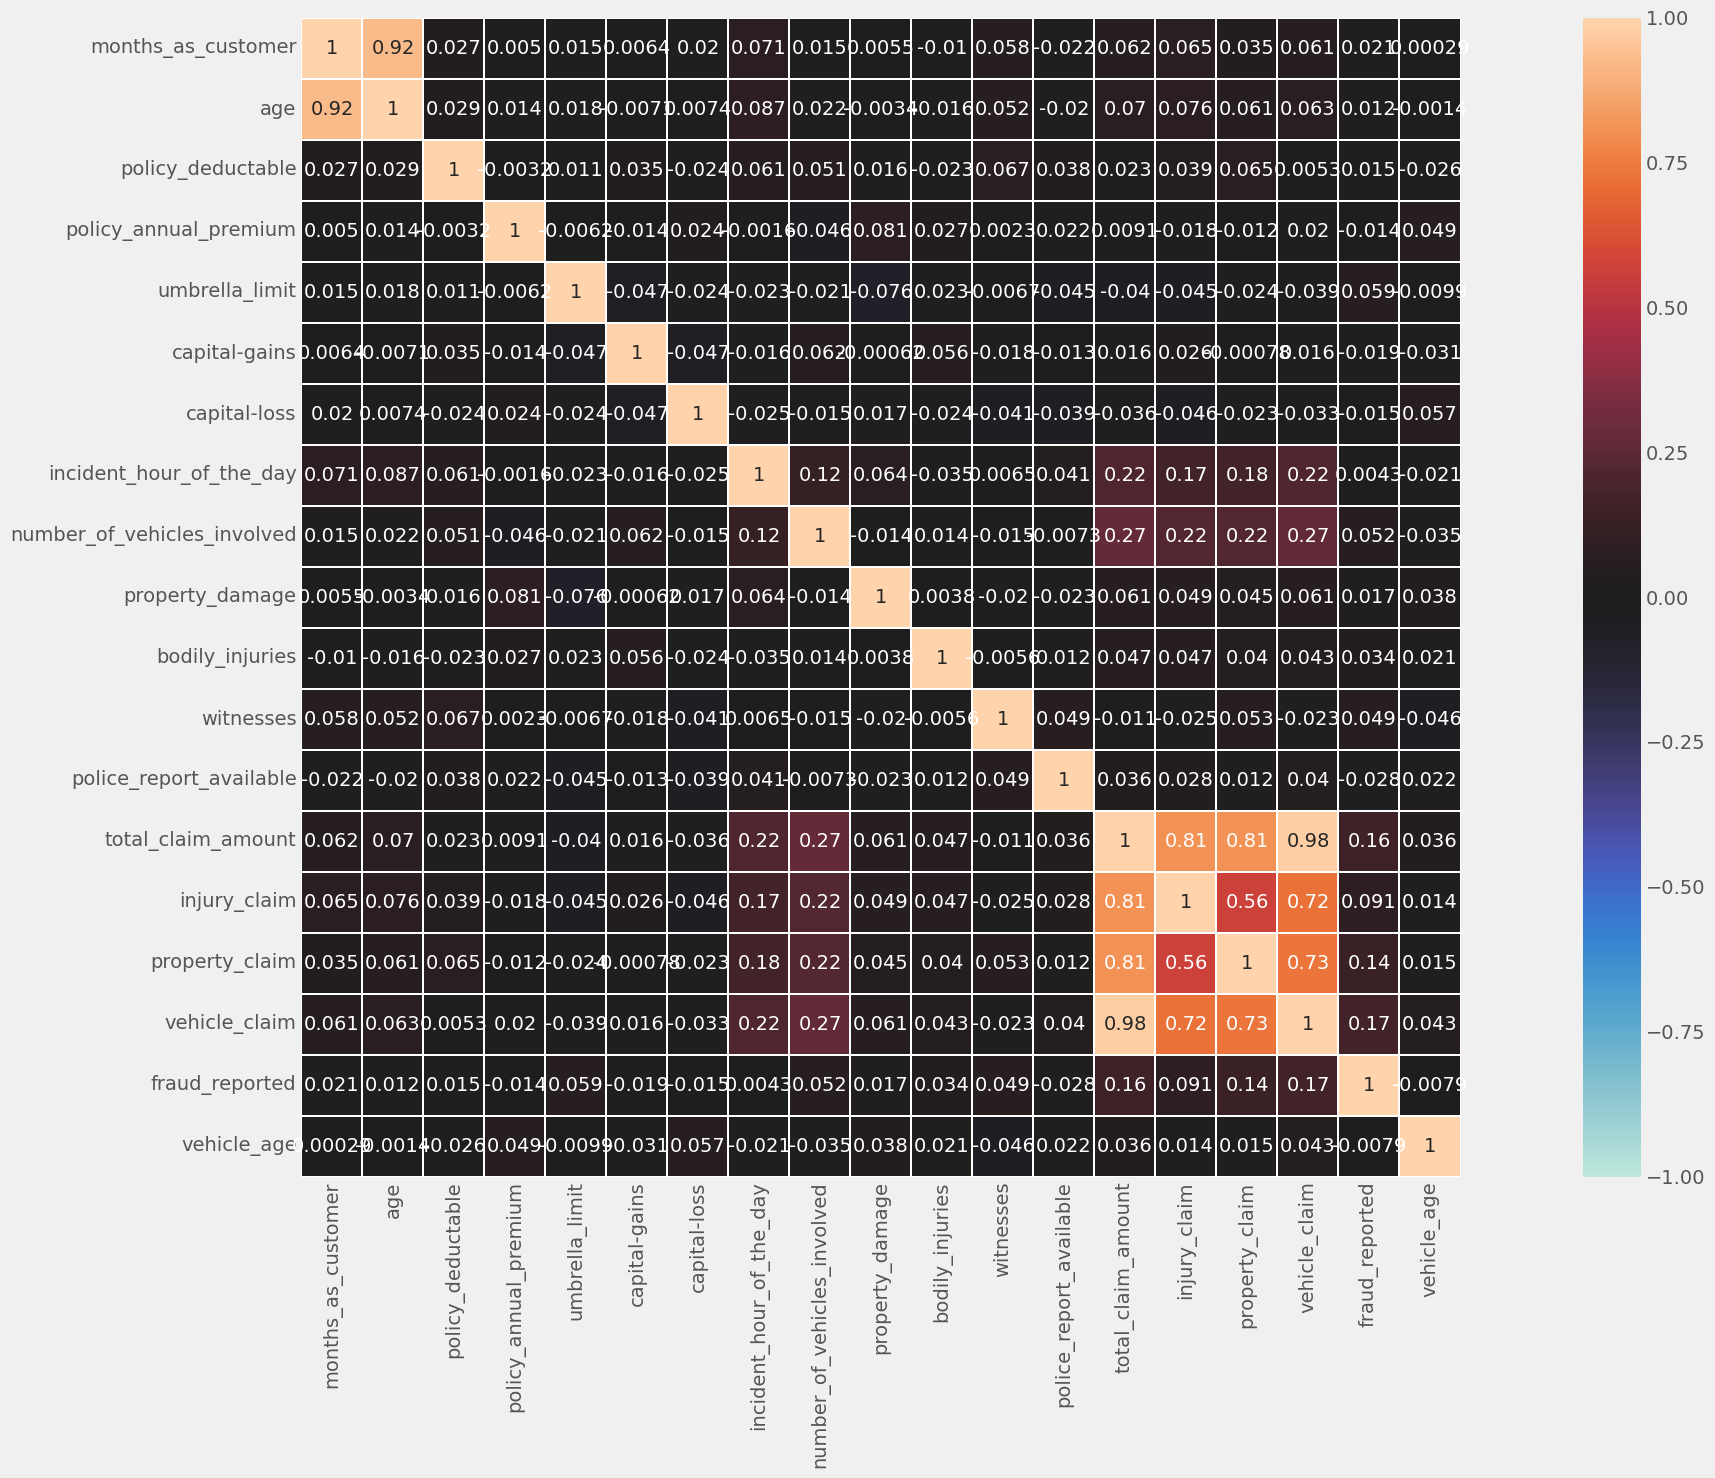

In [86]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

In [87]:
#we can see all features are having very less coefficient of correlation with our target variable.
#total amount claim and vehicle claim having maximum correlation with target variable and that is of 0.16 and 0.17 respectively.
#age and months_as_customer columns are strongly related to each other.
#all four columns representing claim amounts are in good relation with each other.

In [88]:
#describe the data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,vehicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.302000,0.992000,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,0.247000,12.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.459355,0.820127,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,0.431483,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,3.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,0.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,0.000000,1.000000,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,0.000000,13.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,1.000000,2.000000,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,0.000000,18.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,1.000000,2.000000,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,1.000000,23.000000


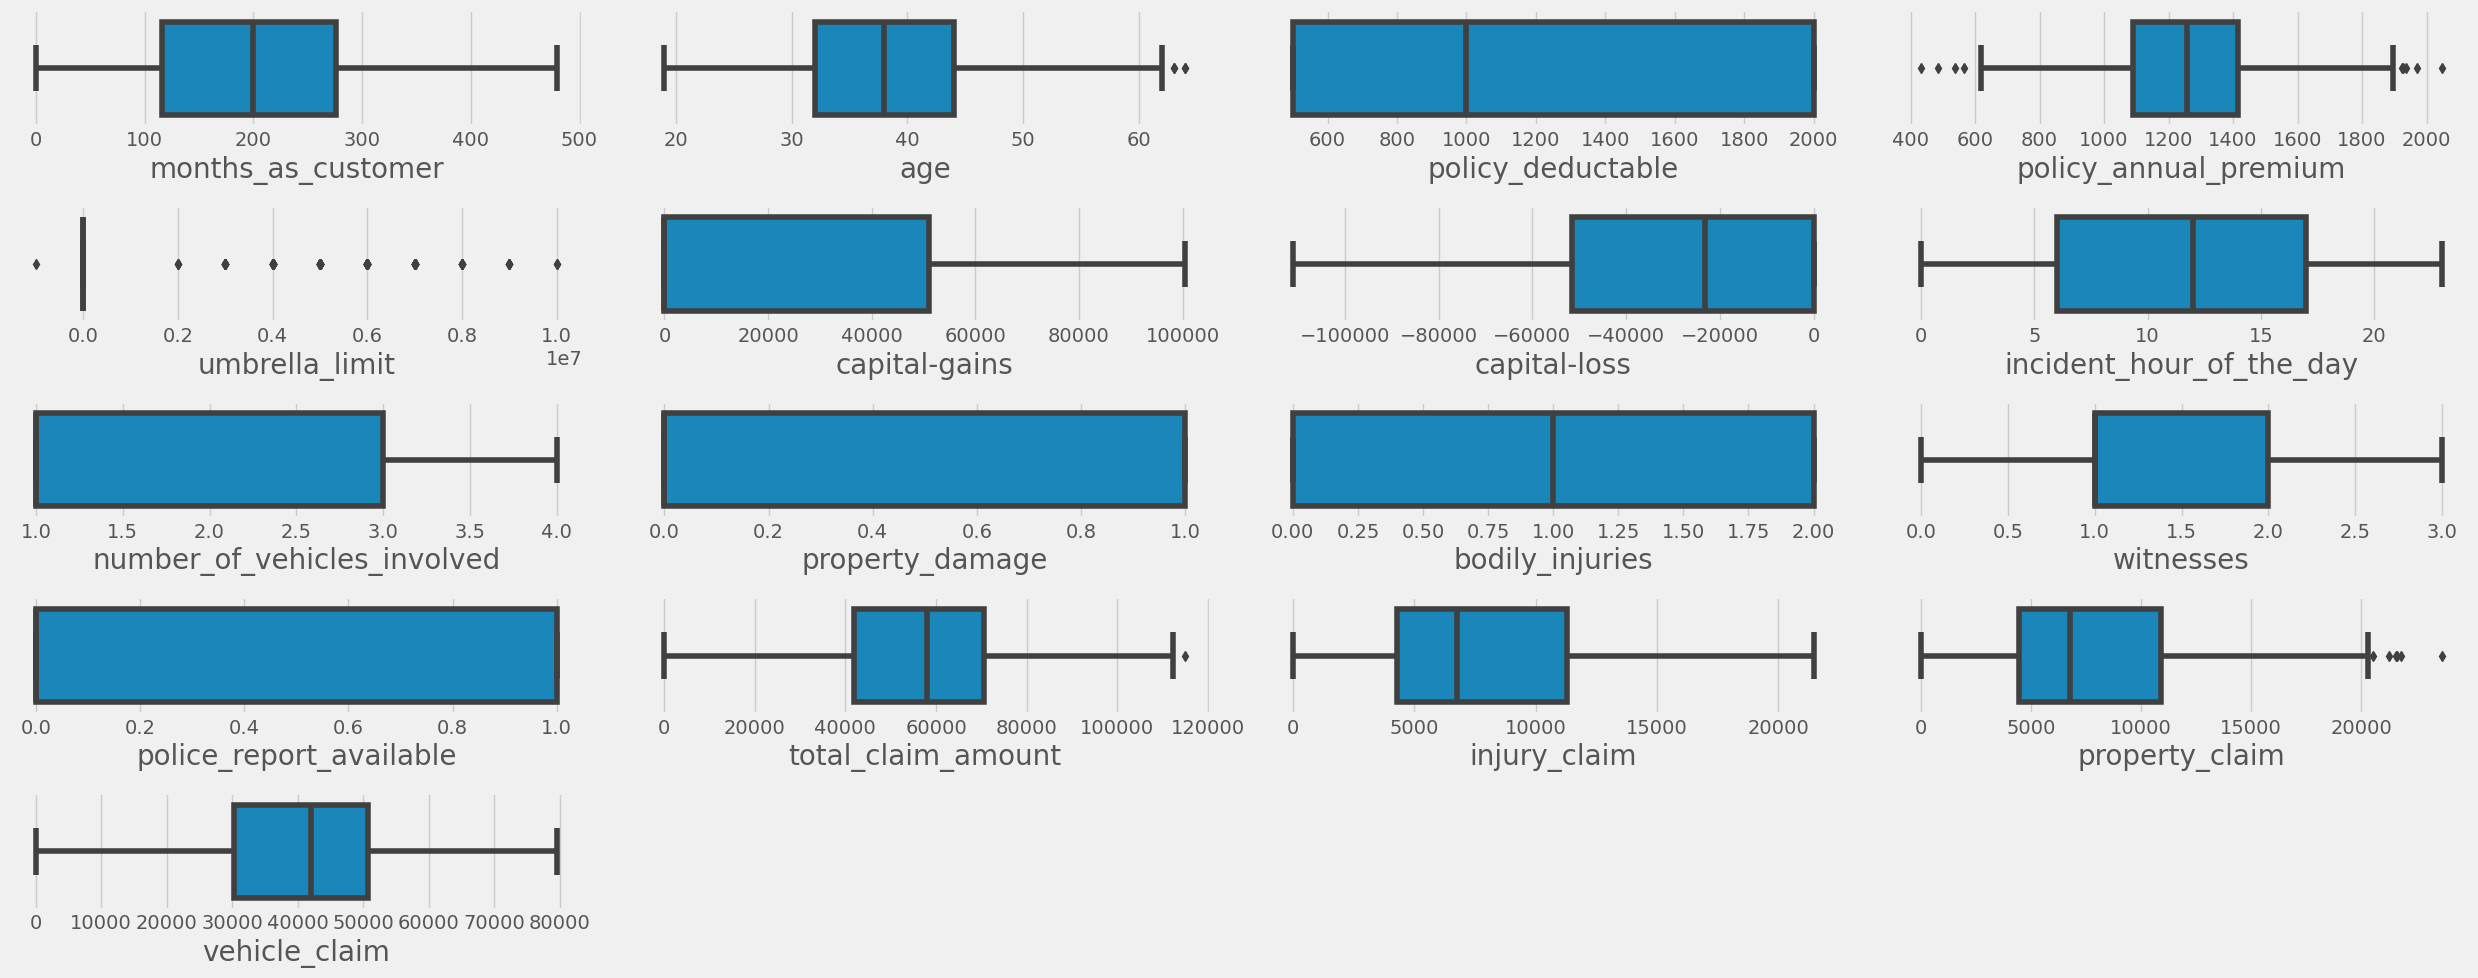

In [89]:
#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [90]:
#looking at above plots we can say there are some outliers present in age, policy_annual_premium, umbrella_limit,total_claim_amount and property_claim columns.we will remove it using zscore method.

In [91]:
#first check the skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
csl_per_person                 0.410015
csl_per_accident               0.605587
vehicle_age                    0.048289
dtype: float64

In [92]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [93]:
df.shape

(981, 37)

In [94]:
#By removing outliers we are loosing about 2% of data, which is acceptable.

In [95]:
#lets drop index column
df.drop(columns = 'index', inplace = True)

In [96]:
#lets check the skewness after removing outliers
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
fraud_reported                 1.189838
csl_per_person                 0.419579
csl_per_accident               0.615942
vehicle_age                    0.054033
dtype: float64

In [97]:
# lets saperate label and features
x = df.drop(columns = 'fraud_reported')
y = df['fraud_reported']

In [98]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

In [99]:
#Lets treat the skewness from numerical columns
for index in num.skew().index:
    if num.skew().loc[index]>0.5:
        num[index]=np.cbrt(num[index])
    if num.skew().loc[index]<-0.5:
        num[index]=np.log1p(num[index])

In [100]:
num.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.428659
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -1.667747
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.676973
vehicle_age                    0.054033
dtype: float64

In [101]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [103]:
#combine both numerical and categorical features
X = pd.concat([x_num,cat], axis = 1)

In [104]:
#lets check our features
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model,csl_per_person,csl_per_accident
0,1.070264,0.983956,-0.225968,0.619923,-0.479247,1.000306,0.954570,-0.958407,-0.831676,1.513918,...,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,Saab,92x,250,500
1,0.202991,0.329985,1.410009,-0.248937,2.035351,-0.906889,0.954570,-0.527848,-0.831676,-0.660538,...,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,Mercedes,E400,250,500
2,-0.612245,-1.086951,1.410009,0.645737,2.035351,0.349069,0.954570,-0.671368,1.171440,-0.660538,...,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,Dodge,RAM,100,300
3,0.445828,0.220990,1.410009,0.656510,2.192912,0.842864,-1.269796,-0.958407,-0.831676,-0.660538,...,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,Chevrolet,Tahoe,250,500
4,0.202991,0.547975,-0.225968,1.353331,2.192912,1.454740,-0.685187,1.194388,-0.831676,-0.660538,...,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,Accura,RSX,500,1000


In [105]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [106]:
#lets have a look at data after encoding
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model,csl_per_person,csl_per_accident
0,1.070264,0.983956,-0.225968,0.619923,-0.479247,1.000306,0.954570,-0.958407,-0.831676,1.513918,...,3.0,0.0,4.0,4.0,1.0,977.0,10.0,1.0,1.0,2.0
1,0.202991,0.329985,1.410009,-0.248937,2.035351,-0.906889,0.954570,-0.527848,-0.831676,-0.660538,...,0.0,1.0,4.0,5.0,5.0,616.0,8.0,12.0,1.0,2.0
2,-0.612245,-1.086951,1.410009,0.645737,2.035351,0.349069,0.954570,-0.671368,1.171440,-0.660538,...,2.0,1.0,4.0,1.0,1.0,671.0,4.0,30.0,0.0,1.0
3,0.445828,0.220990,1.410009,0.656510,2.192912,0.842864,-1.269796,-0.958407,-0.831676,-0.660538,...,1.0,0.0,4.0,2.0,0.0,656.0,3.0,34.0,1.0,2.0
4,0.202991,0.547975,-0.225968,1.353331,2.192912,1.454740,-0.685187,1.194388,-0.831676,-0.660538,...,0.0,1.0,2.0,1.0,0.0,214.0,0.0,31.0,2.0,0.0


In [107]:
#check value count for target variable
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

In [108]:
#We can see that this is a case of imbalance, so will do oversampling

In [109]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [110]:
#lets check the target variable now
y_over.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

In [111]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7897574123989218 on Random State 895


In [112]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 682 )

In [113]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 75.2021563342318
roc_auc_score: 75.36080074487896
---------------------------------------------------
Confusion Matrix : 
 [[143  36]
 [ 56 136]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.72      0.80      0.76       179
           1       0.79      0.71      0.75       192

    accuracy                           0.75       371
   macro avg       0.75      0.75      0.75       371
weighted avg       0.76      0.75      0.75       371


Cross validation score : 73.21512787955741

Accuracy Score - Cross Validation Score : 1.9870284546743875


In [114]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 87.87061994609164
roc_auc_score: 87.94081703910615
---------------------------------------------------
Confusion Matrix : 
 [[161  18]
 [ 27 165]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       179
           1       0.90      0.86      0.88       192

    accuracy                           0.88       371
   macro avg       0.88      0.88      0.88       371
weighted avg       0.88      0.88      0.88       371


Cross validation score : 83.89171050244876


Accuracy Score - Cross Validation Score : 3.978909443642877


In [115]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 89.75741239892183

roc_auc_score: 89.91503724394785
---------------------------------------------------
Confusion Matrix : 
 [[169  10]
 [ 28 164]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       179
           1       0.94      0.85      0.90       192

    accuracy                           0.90       371
   macro avg       0.90      0.90      0.90       371
weighted avg       0.90      0.90      0.90       371


Cross validation score : 86.79666243424633


Accuracy Score - Cross Validation Score : 2.9607499646755002


In [116]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 62.264150943396224
roc_auc_score: 61.65037243947859
---------------------------------------------------
Confusion Matrix : 
 [[ 79 100]
 [ 40 152]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.66      0.44      0.53       179
           1       0.60      0.79      0.68       192

    accuracy                           0.62       371
   macro avg       0.63      0.62      0.61       371
weighted avg       0.63      0.62      0.61       371


Cross validation score : 68.62869580990386


Accuracy Score - Cross Validation Score : -6.364544866507636


In [117]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [118]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 91.64420485175202
roc_auc_score: 91.64338919925513
---------------------------------------------------
Confusion Matrix : 
 [[164  15]
 [ 16 176]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       179
           1       0.92      0.92      0.92       192

    accuracy                           0.92       371
   macro avg       0.92      0.92      0.92       371
weighted avg       0.92      0.92      0.92       371


Cross validation score : 88.47542173045528

Accuracy Score - Cross Validation Score : 3.168783121296741


In [119]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 91.64420485175202
roc_auc_score: 91.64338919925513
---------------------------------------------------
Confusion Matrix : 
 [[164  15]
 [ 16 176]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       179
           1       0.92      0.92      0.92       192

    accuracy                           0.92       371
   macro avg       0.92      0.92      0.92       371
weighted avg       0.92      0.92      0.92       371


Cross validation score : 89.8957010701977

Accuracy Score - Cross Validation Score : 1.7485037815543194


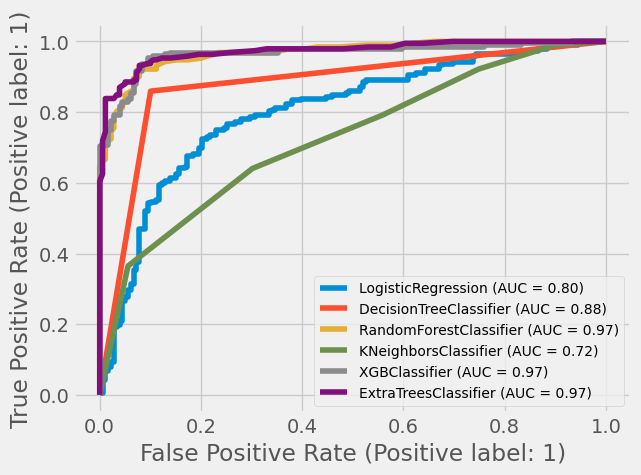

In [120]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

In [121]:
#We can see ExtraTreesClassifier is giving least difference in accuracy and cv score which is of 0.065.
#And looking at AUC and roc curve RandomForestClassifier, XGBClassifier, and ExtraTreesClassifier are giving nearly same performances, among which ExtraTreesClassifier is giving heighst AUC
#After these observations and evaluations I can conclude that the best suitable model is ExtraTreesClassifier.

In [122]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [125]:
GCV =  GridSearchCV(ExtraTreesClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [500, 700, 1000, 1200]})

In [126]:
GCV.best_params_  

{'criterion': 'entropy',
 'max_depth': 22,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 500}

In [127]:
#lets check the results of final model with best parameters
model = ExtraTreesClassifier(criterion = 'gini', max_depth = 20, max_features = 'sqrt', min_samples_split = 2, n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 91.91374663072777%
roc_auc_score: 92.03619646182494%
Confusion Matrix : 
 [[171   8]
 [ 22 170]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       179
           1       0.96      0.89      0.92       192

    accuracy                           0.92       371
   macro avg       0.92      0.92      0.92       371
weighted avg       0.92      0.92      0.92       371



{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 1000}